In [16]:
import os
import pandas as pd
## first file in current dir (with full path)
file = os.path.join(os.getcwd(), os.listdir(os.getcwd())[0])
file
os.path.dirname(file) ## directory of file
os.path.dirname(os.path.dirname(file)) ## directory of directory of file

from os import listdir
from os.path import isfile, join
mypath = '/Users/lehuyen/Dropbox/Stage_data/data_month'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

index = 0
list_all_df = []
for  file in onlyfiles:
    if 'csv' in file:
        if index ==0:
            path = os.path.join(mypath, file)
            df_all = pd.read_csv(path,  sep='\n', header=0, delimiter=";",decimal=',')
            list_all_df.append(df_all)
        else:
            path = os.path.join(mypath, file)
            this_df = pd.read_csv(path,  sep='\n', header=0, delimiter=";",decimal=',')
            df_all = df_all.append(this_df)
            list_all_df.append(this_df)
        index +=1
        
print(df_all.shape)
df_all.head()

(4216, 7)


,Time,CPU usage,Used memory,Number of bytes received,Number of bytes transmitted,RLATE,WLATE
0,2019-01-01T00:00:00+01:00,9.546817e+09,2.340000e+11,1019716.0,837034.0,12,13
1,2019-01-01T01:00:00+01:00,8.559083e+09,2.340000e+11,1566993.0,27111884.0,10,10
2,2019-01-01T02:00:00+01:00,7.698983e+09,2.460000e+11,3429444.0,7889186.0,10,15
3,2019-01-01T03:00:00+01:00,7.631850e+09,2.480000e+11,1017924.0,612881.0,12,10
4,2019-01-01T04:00:00+01:00,8.352433e+09,2.480000e+11,846131.0,1663897.0,12,60


In [17]:
for df in list_all_df:
    df.columns =['Time','CPU','MEM','REC', 'TRAN','RLATE','WLATE']

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

def data_process(df, n_components=2):

    df = df.drop(['Time'], axis=1)
    df = df.fillna(df.mean())
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df)
    pca = PCA(n_components=n_components)
   ## Estimation, calcul des composantes principales
    X_pca= pca.fit(X_scaled).transform(X_scaled)
    ratio = sum(pca.explained_variance_ratio_)*100
    return X_pca, ratio

In [19]:
list_all_data_reduce = []
list_of_ratio_pca = []
for data in list_all_df:
    this_pca, this_ratio = data_process(data)
    list_all_data_reduce.append(this_pca)
    list_of_ratio_pca.append(this_ratio)
list_all_data_reduce[0].shape

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all conve

(745, 2)

In [20]:
list_of_ratio_pca

[59.844670159392145,
 78.76667752061324,
 76.36674484548507,
 85.13132897769728,
 80.17490417609935,
 72.43435592857566]

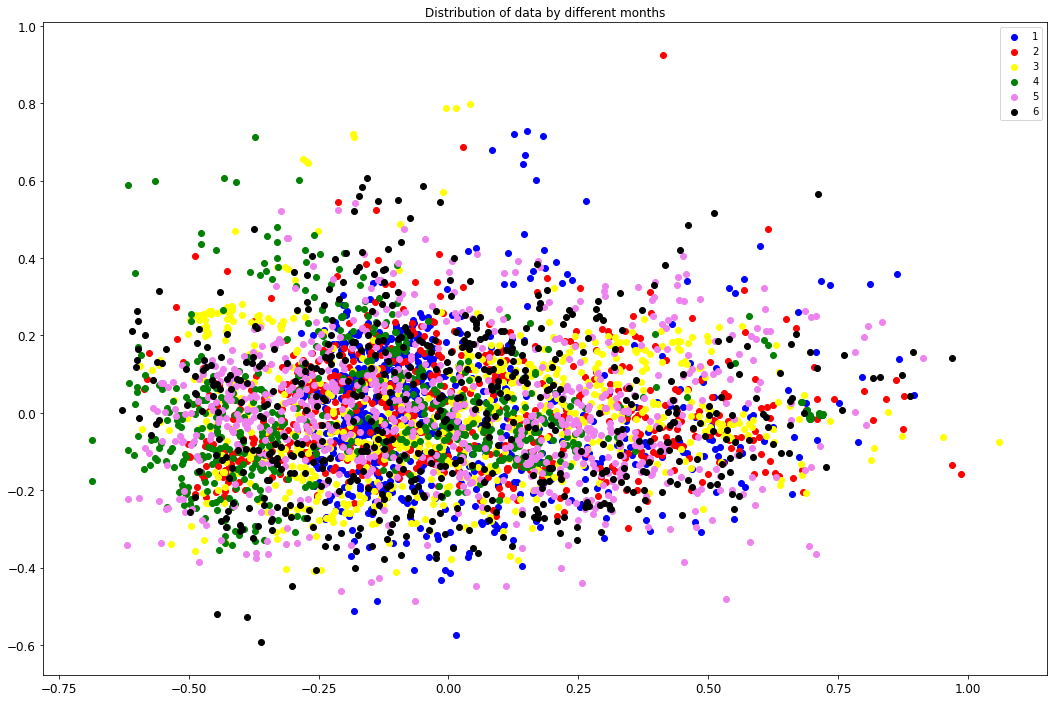

In [21]:
import matplotlib.pyplot as plt
list_of_colors = ['blue', 'red', 'yellow', 'green', 'violet','black']
list_of_data_month = [i +1 for i in range(6)]
plt.figure(figsize=(18,12))
for index, data in enumerate(list_all_data_reduce):
    plt.scatter(data[:,0], data[:,1], color=list_of_colors[index])  
plt.title('Distribution of data by different months')
plt.legend(list_of_data_month)
plt.show()

In [22]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [23]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [38]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
#gm.fit(X_scaled)plt.figure(figsize=(8, 4))

df_reduced = data_process(df_all, n_components= 2)[0]
gm.fit(df_reduced)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
from matplotlib.colors import LogNorm
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    plt.plot(X[:,0], X[:,1],'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


Saving figure gaussian_mixtures_plot


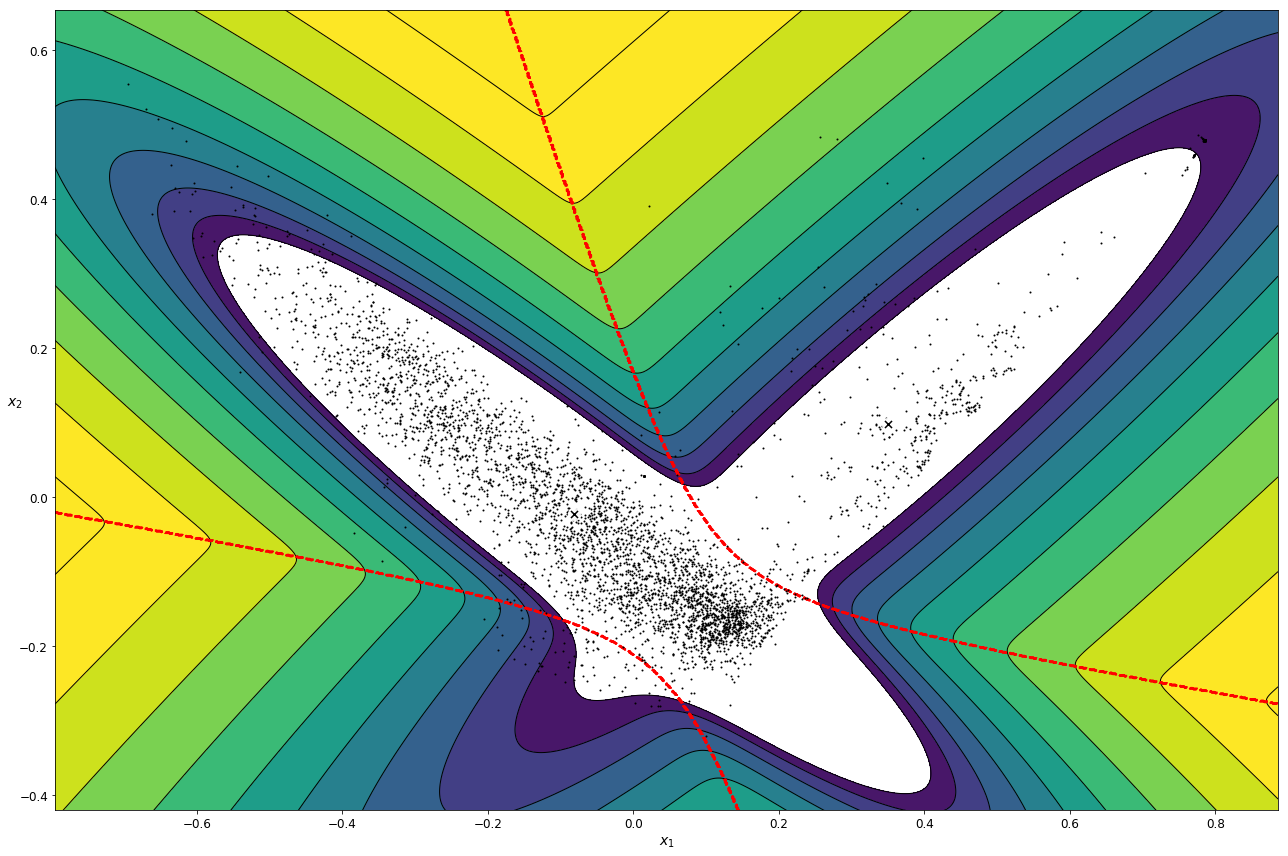

In [39]:
plt.figure(figsize=(18, 12))

plot_gaussian_mixture(gm, df_reduced)

save_fig("gaussian_mixtures_plot")
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


Saving figure mixture_anomaly_detection_plot


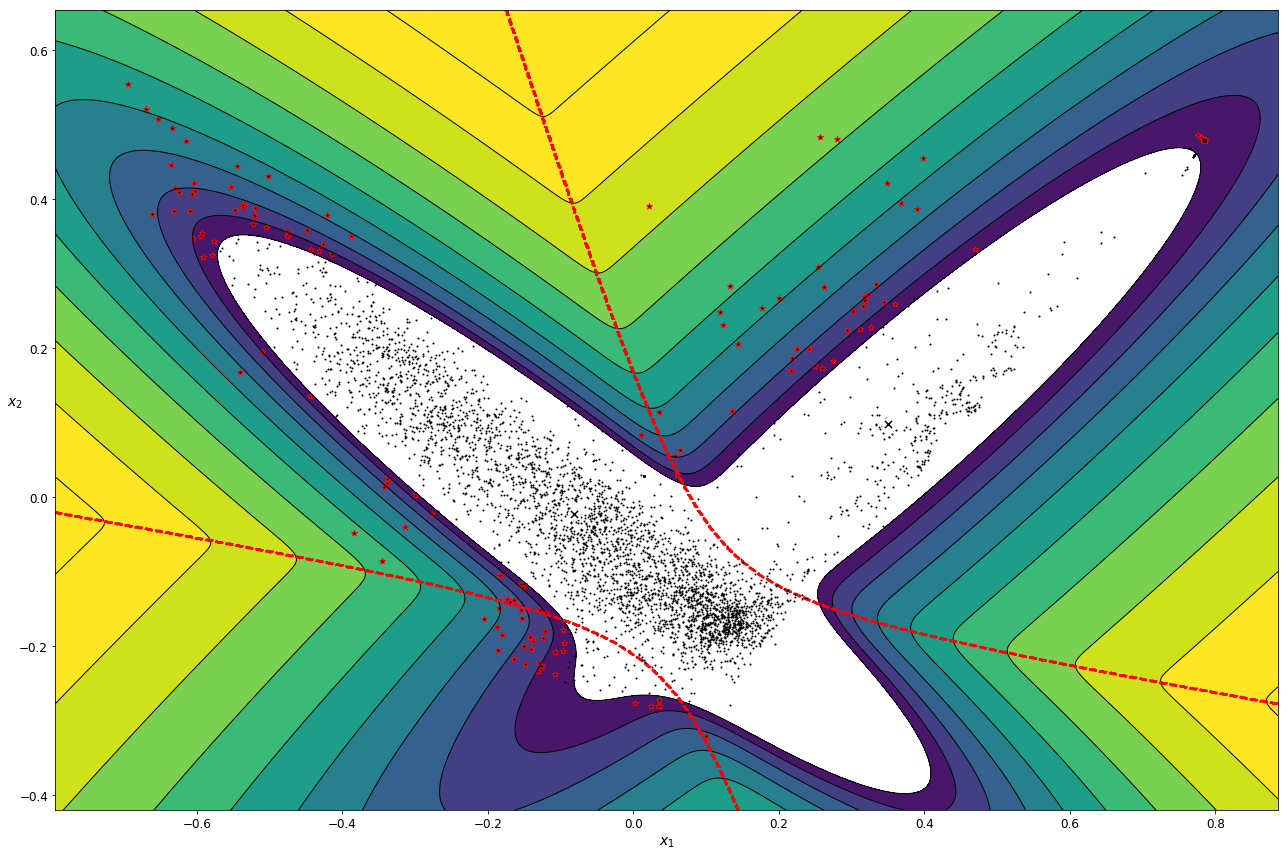

In [40]:
densities = gm.score_samples(df_reduced)
density_threshold = np.percentile(densities, 4)
anomalies = df_reduced[densities < density_threshold]

plt.figure(figsize=(18, 12))

plot_gaussian_mixture(gm, df_reduced)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
#plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

# TEST FOR ONE DAY

In [45]:
test = pd.read_csv('/Users/lehuyen/Dropbox/Stage_data/20-26/ESX01_2007.csv', sep='\n', header=0, delimiter=";",decimal=',')
test.columns =['Time','CPU','MEM','REC', 'TRAN','RLATE','WLATE']
test_reduced = data_process(test,n_components=2)[0]

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


Saving figure mixture_anomaly_detection_plot_for_test


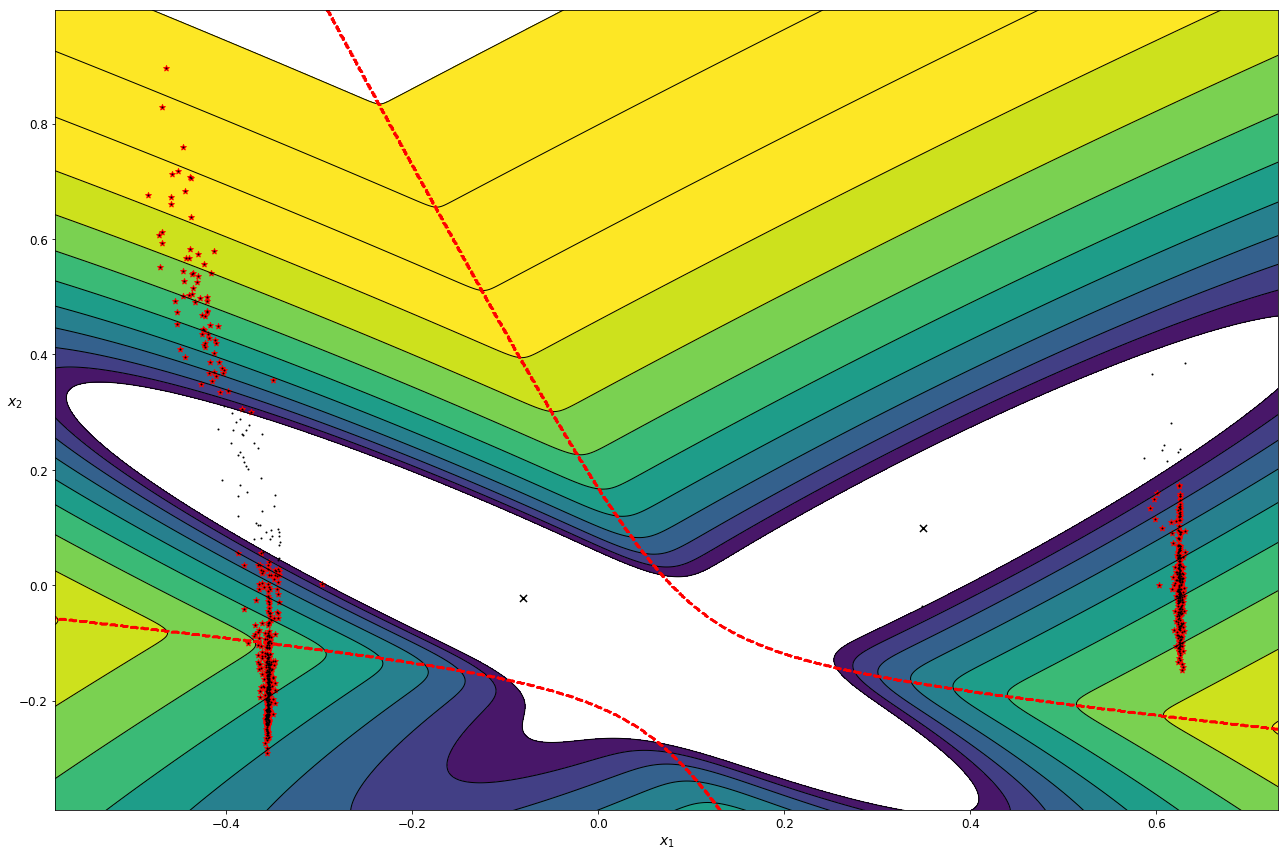

In [46]:
densities_test = gm.score_samples(test_reduced)
anomalies_test = test_reduced[densities_test < density_threshold]
plt.figure(figsize=(18, 12))

plot_gaussian_mixture(gm, test_reduced)
plt.scatter(anomalies_test[:, 0], anomalies_test[:, 1], color='r', marker='*')
#plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot_for_test")
plt.show()

In [43]:
anomalies_test.shape

(188, 2)